In [1]:
## decision tree classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [3]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (122289, 1044)
shape of X_test:  (60232, 1044)
shape of Y_train:  (122289, 5)
shape of Y_test:  (60232, 5)


In [4]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [5]:
## decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
## predictions and evaluation

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55     35586
           1       0.87      0.78      0.82     35586
           2       0.91      0.81      0.86     35586
           3       0.80      0.73      0.76     35586
           4       0.53      0.60      0.57     35586

   micro avg       0.72      0.69      0.71    177930
   macro avg       0.73      0.69      0.71    177930
weighted avg       0.73      0.69      0.71    177930
 samples avg       0.69      0.69      0.69    177930



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.6915303771145956


In [8]:
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [9]:
matrix

array([[21098,  1965,  1522,  1976,  9025],
       [ 3707, 27636,   193,  1180,  2870],
       [ 4393,    99, 28730,   427,  1937],
       [ 3684,   651,   497, 25878,  4876],
       [ 9130,  1566,   673,  2820, 21397]])

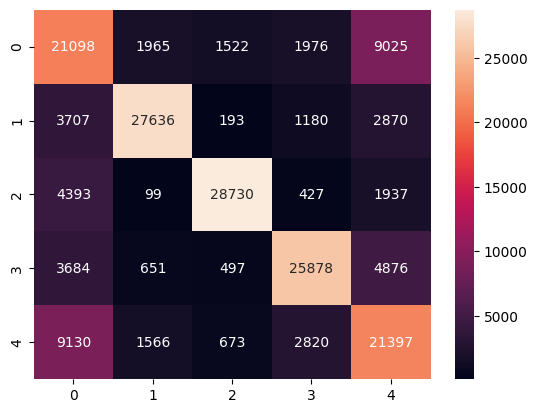

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()